In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
flat_chess = cv2.imread("Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

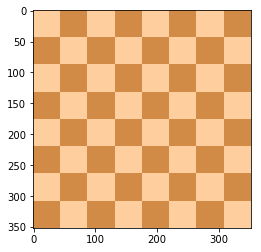

In [28]:
plt.imshow(flat_chess)

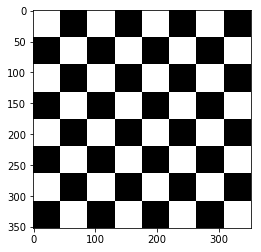

In [29]:
gray_flat = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat, cmap='gray')

In [30]:
real_chess = cv2.imread("Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

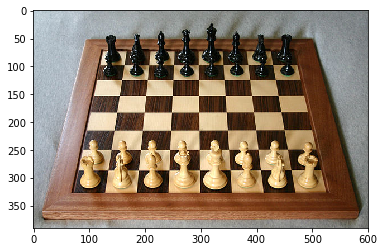

In [31]:
plt.imshow(real_chess)

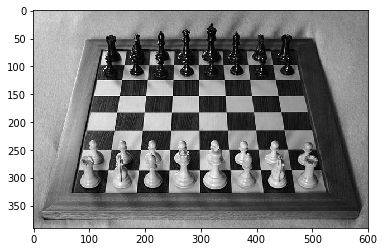

In [32]:
gray_real = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real, cmap='gray')

In [33]:
gray = np.float32(gray_flat)

In [34]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [35]:
dst = cv2.dilate(dst, None)

In [36]:
flat_chess[dst>0.01*dst.max()] = [255,0,0]

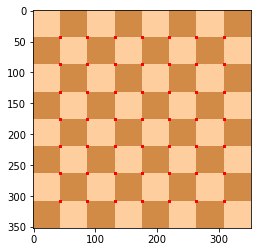

In [37]:
plt.imshow(flat_chess)

In [38]:
gray = np.float32(gray_real)
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [39]:
dst = cv2.dilate(dst, None)

In [40]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

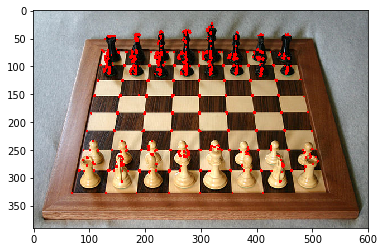

In [41]:
plt.imshow(real_chess)

In [42]:
real_chess = cv2.imread("Computer-Vision-with-Python/DATA/real_chessboard.jpg")
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread("Computer-Vision-with-Python/DATA/flat_chessboard.png")
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [55]:
corners = cv2.goodFeaturesToTrack(gray_flat, 64, 0.01, 10)

In [56]:
corners = np.int0(corners)

In [57]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess, (x,y), 3, (255,0,0), -1)

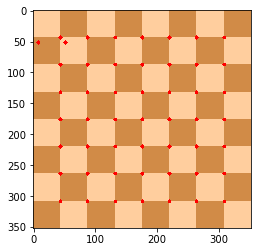

In [58]:
plt.imshow(flat_chess)

In [59]:
corners = cv2.goodFeaturesToTrack(gray_real, 80, 0.01, 10)

In [61]:
corners = np.int0(corners)

In [62]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, (255,0,0), -1)

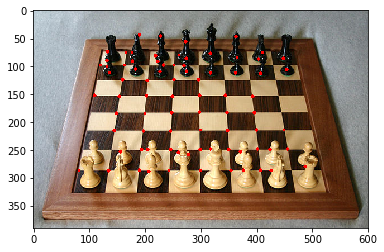

In [63]:
plt.imshow(real_chess)

In [64]:
## EDGE DETECTION:

In [65]:
img = cv2.imread("Computer-Vision-with-Python/DATA/sammy_face.jpg")

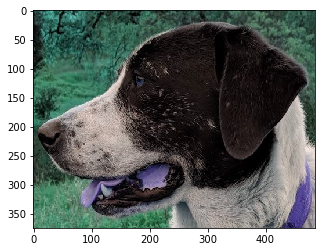

In [66]:
plt.imshow(img)

In [67]:
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)

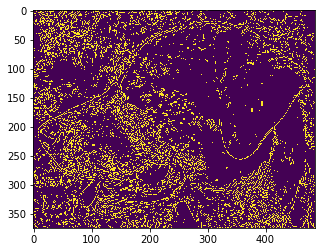

In [68]:
plt.imshow(edges)

In [69]:
med_val = np.median(img)
med_val

64.0

In [70]:
lower = int(max(0, 0.7*med_val)) # set to 0 or 70% of median, whichever is greater

upper = int(min(255, 1.3*med_val)) # set to 255 or 130% of median, whichever is smaller

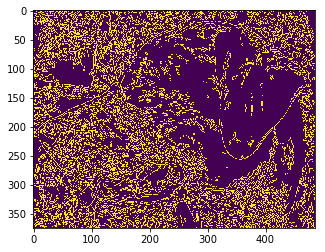

In [72]:
edges = cv2.Canny(image=img, threshold1=lower, threshold2=upper+100)
plt.imshow(edges)

In [73]:
upper

83

In [78]:
blurred = cv2.blur(img, ksize=(5,5))

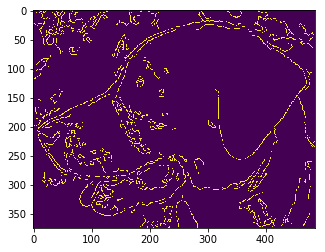

In [79]:
edges = cv2.Canny(image=blurred, threshold1=lower, threshold2=upper+50)
plt.imshow(edges)

In [80]:
# GRID DETECTION

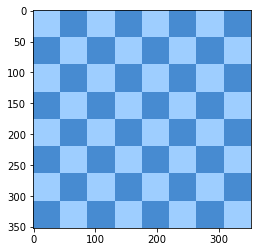

In [83]:
flat_chess = cv2.imread("Computer-Vision-with-Python/DATA/flat_chessboard.png")
plt.imshow(flat_chess)

In [84]:
found,corners = cv2.findChessboardCorners(flat_chess, (7,7))

In [86]:
found # Let's us know whether or not it was found. Useful. Ex: if found...

True

In [87]:
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

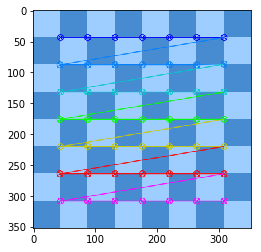

In [88]:
plt.imshow(flat_chess)

In [89]:
dots = cv2.imread("Computer-Vision-with-Python/DATA/dot_grid.png")

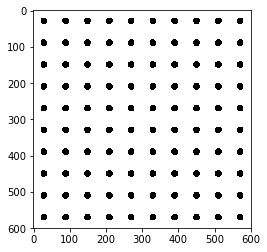

In [90]:
plt.imshow(dots)

In [91]:
found,corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [92]:
found

True

In [94]:
#corners

In [97]:
cv2.drawChessboardCorners(dots, (10,10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

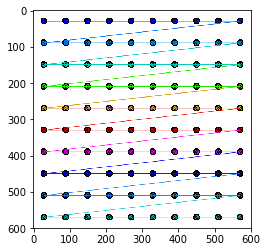

In [98]:
plt.imshow(dots)

In [99]:
## CONTOUR DETECTION

In [100]:
img = cv2.imread("Computer-Vision-with-Python/DATA/internal_external.png", 0)
img.shape

(652, 1080)

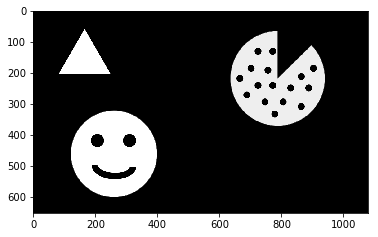

In [101]:
plt.imshow(img, cmap='gray')

In [102]:
image, contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [103]:
type(contours)

list

In [104]:
len(contours)

22

In [105]:
type(hierarchy)

numpy.ndarray

In [106]:
hierarchy

array([[[ 4, -1,  1, -1],
        [ 2, -1, -1,  0],
        [ 3,  1, -1,  0],
        [-1,  2, -1,  0],
        [21,  0,  5, -1],
        [ 6, -1, -1,  4],
        [ 7,  5, -1,  4],
        [ 8,  6, -1,  4],
        [ 9,  7, -1,  4],
        [10,  8, -1,  4],
        [11,  9, -1,  4],
        [12, 10, -1,  4],
        [13, 11, -1,  4],
        [14, 12, -1,  4],
        [15, 13, -1,  4],
        [16, 14, -1,  4],
        [17, 15, -1,  4],
        [18, 16, -1,  4],
        [19, 17, -1,  4],
        [20, 18, -1,  4],
        [-1, 19, -1,  4],
        [-1,  4, -1, -1]]], dtype=int32)

In [107]:
external_contours = np.zeros(image.shape)
external_contours.shape

(652, 1080)

In [108]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)

In [111]:
#contours

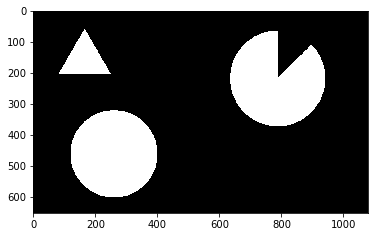

In [110]:
plt.imshow(external_contours, cmap='gray')

In [112]:
internal_contours = np.zeros(image.shape)

for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)

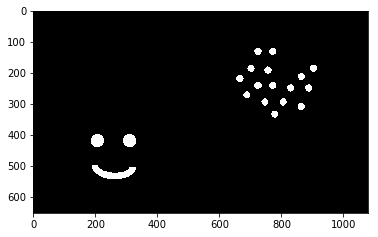

In [113]:
plt.imshow(internal_contours, cmap='gray')